# DriX: process adcp data


In [4]:
import os
from glob import glob

import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline
import matplotlib.pyplot as plt
import hvplot.xarray  # noqa
import hvplot.pandas  # noqa

import pynsitu as pin
crs = pin.maps.crs

import utils as ut
import cswot

In [14]:
# load campaign object
cp = pin.Campaign("cswot23.yaml")
p = cp["DriX"]
cp

Campaign(cswot23 2023/04/17 to 2023/04/22)

---

## load data

In [5]:
sta_files = sorted(glob(os.path.join(cp["path_raw"], "ADCP/*.STA")))

D = ut.load_adcp_sta(sta_files, cp["start"], cp["end"])
#D_leg1 = ut.load_adcp_sta(sta_files, cp["leg1"].start.time, cp["leg1"].end.time)
#D_leg2 = ut.load_adcp_sta(sta_files, cp["leg2"].start.time, cp["leg2"].end.time)

# swot
sw_passes = cswot.load_swot_pass("med_central", start=cp["start"], end = cp["end"])
sw_ssh = cswot.load_swot_snapshots("ssh", start=cp["start"], end = cp["end"])
sw_sig0 = cswot.load_swot_snapshots("sig0", start=cp["start"], end = cp["end"])

In [6]:
list(sw_ssh)

['20230420_p003',
 '20230420_p016',
 '20230421_p016',
 '20230422_p003',
 '20230422_p016']

## plot data

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)


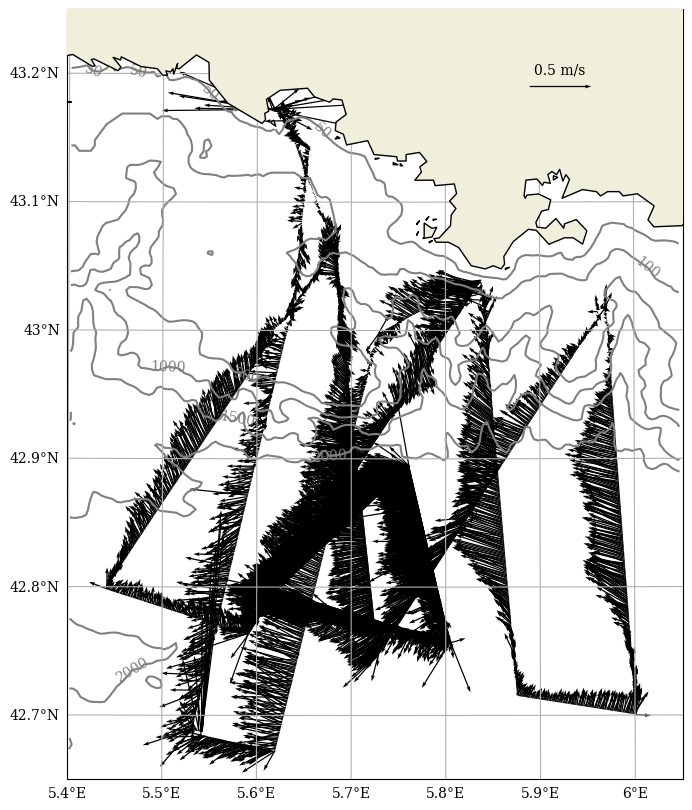

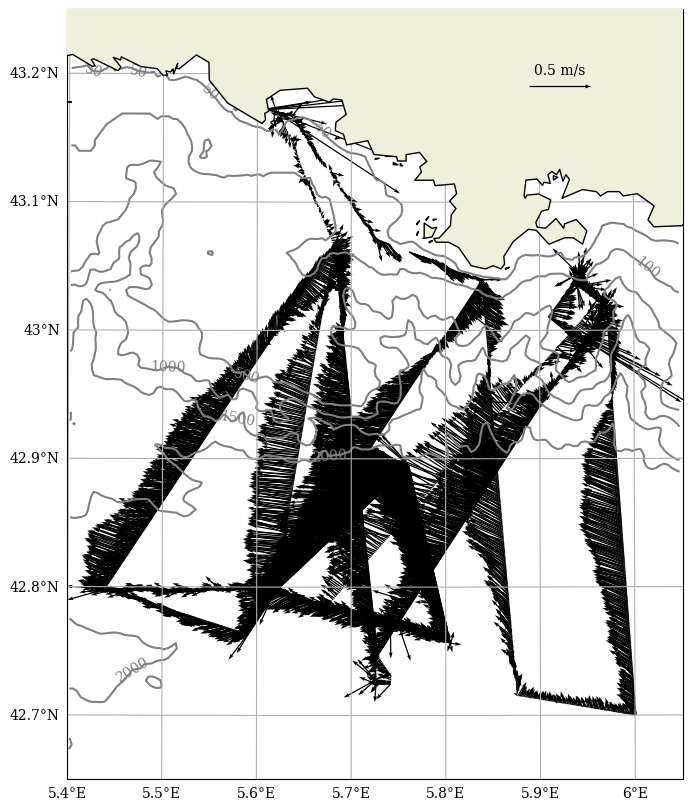

In [7]:
for d in [cp["leg1"], cp["leg2"]]:
    fig, ax, _ = cp.map(coastline="h", figsize=(10,10))
    ut.add_adcp(ax, D, 1, 30, tstart=d.start.time, tend=d.end.time)

## big Ms

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)


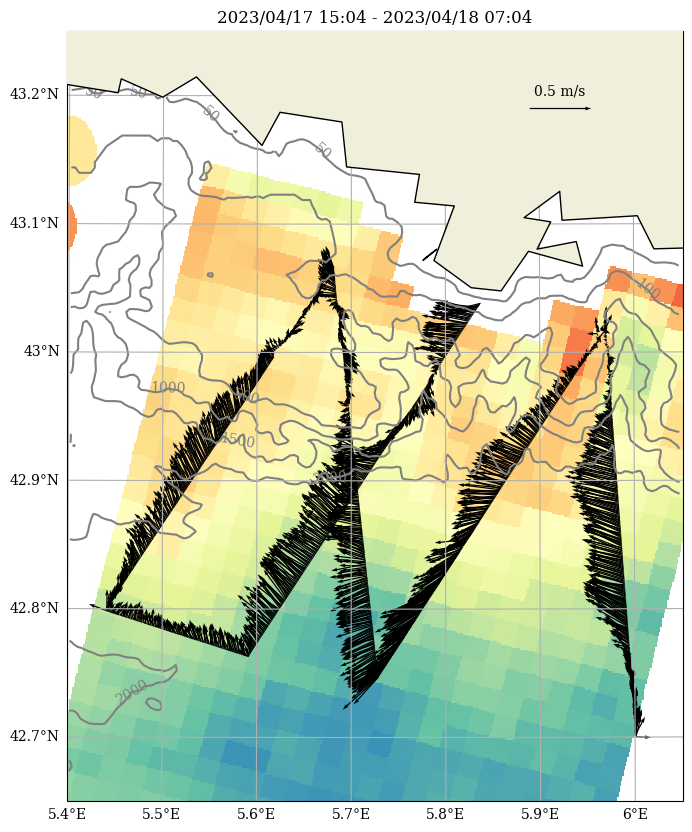

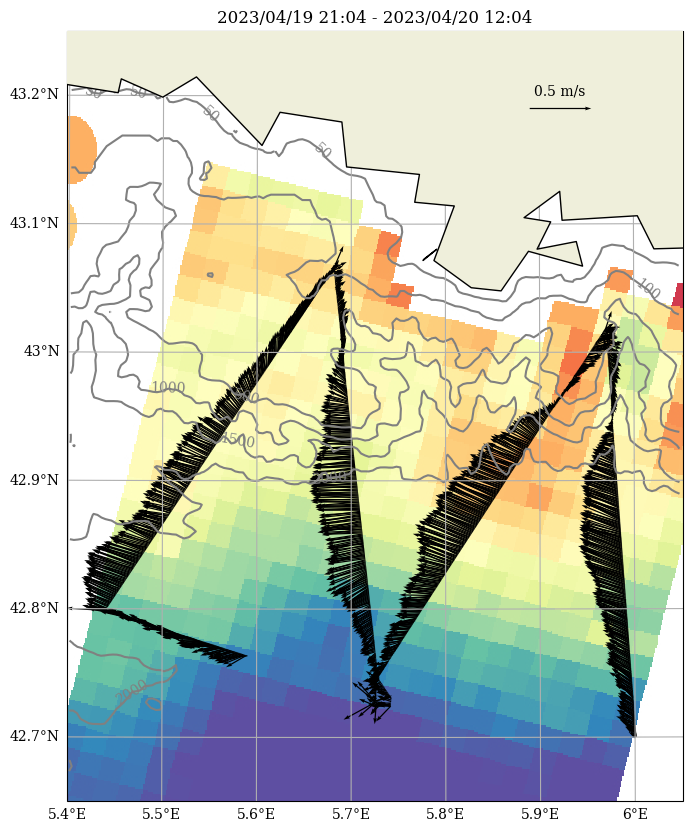

In [15]:
for d, s in zip(["M0", "M1"], [sw_ssh['20230420_p003'], sw_ssh['20230422_p003']]):
    start, end = p[d].start.time, p[d].end.time
    fig, ax, _ = cp.map(coastline="i", figsize=(10,10))
    xr.plot.imshow(s, rgb="band", ax=ax, transform=crs)    
    ut.add_adcp(ax, D, 1, 30, tstart=start, tend=end)
    #
    fmt = "%Y/%m/%d %H:%m"
    ax.set_title(start.strftime(fmt)+" - "+end.strftime(fmt))

## T

In [20]:
# T
e = [5.58, 5.81, 42.74, 42.91]

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)


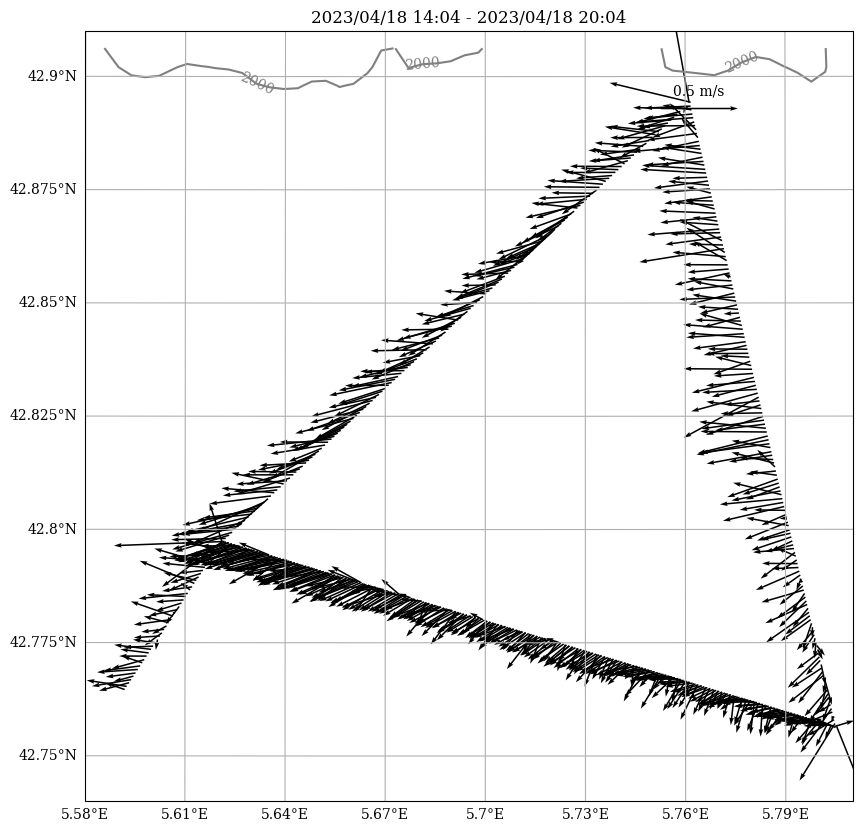

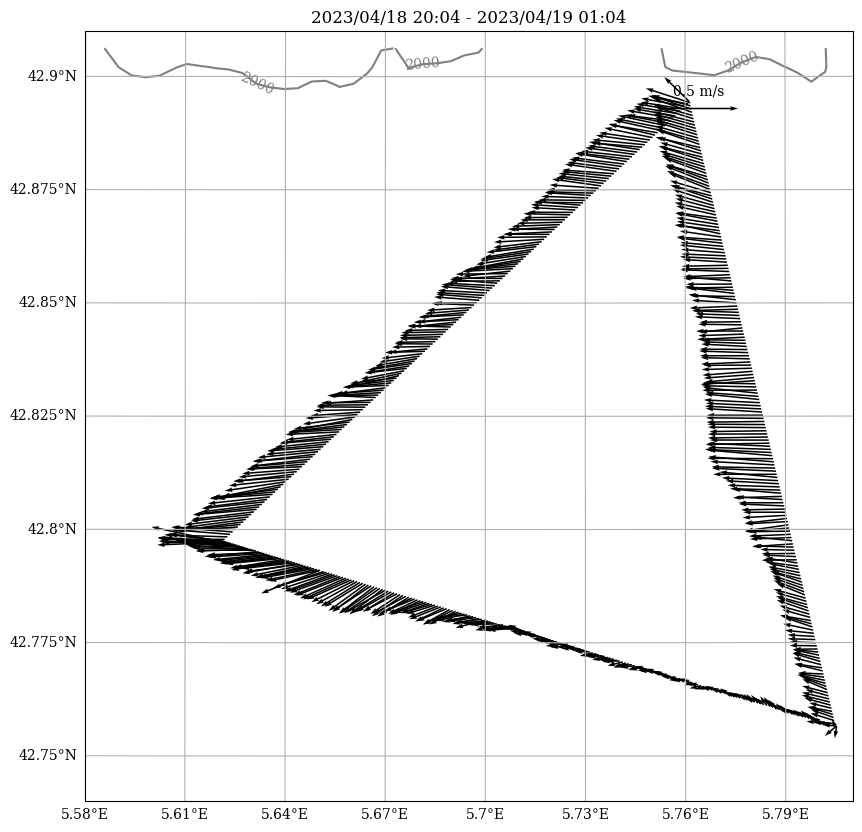

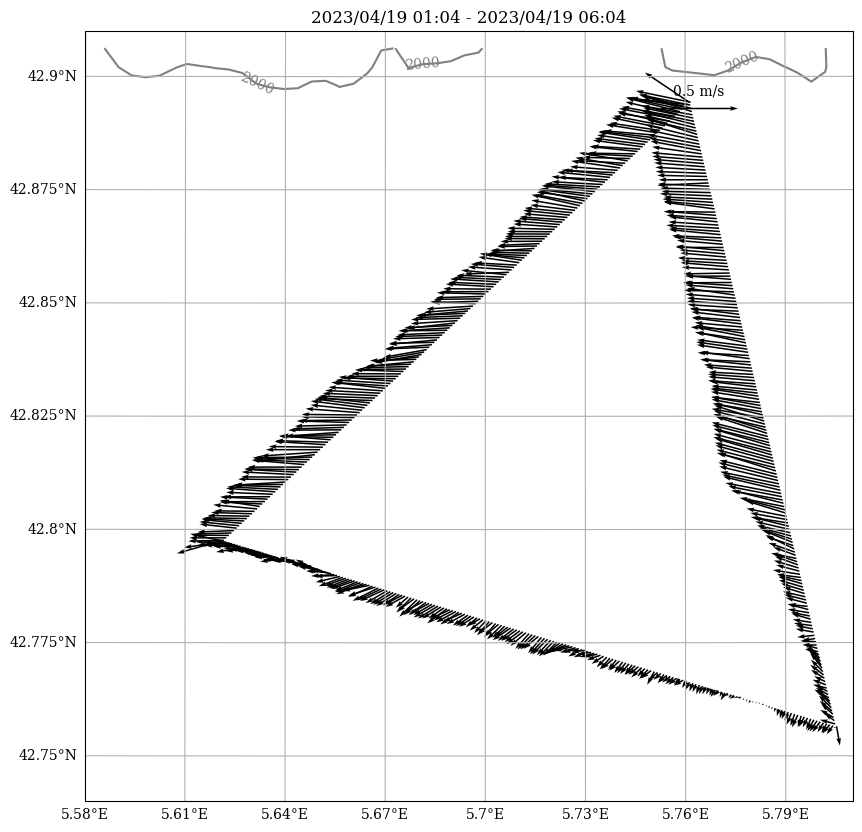

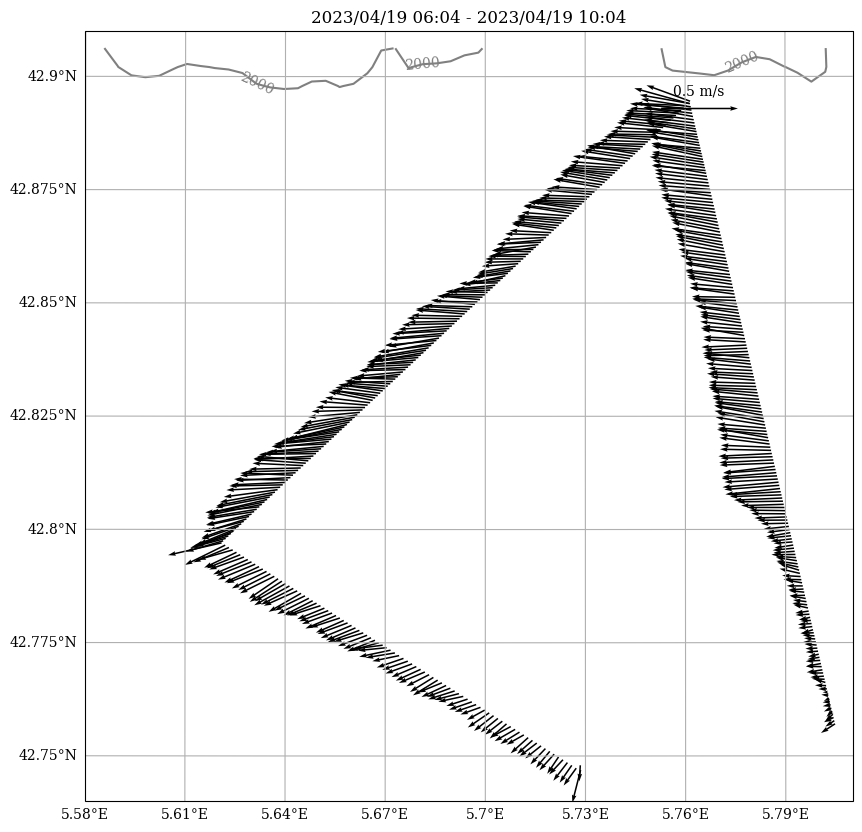

In [21]:

for i in range(4):
    d = f"T0{i}"
    start, end = p[d].start.time, p[d].end.time
    fig, ax, _ = cp.map(coastline="i", figsize=(10,10), extent=e)
    ut.add_adcp(ax, D, 1, 30, tstart=start, tend=end)
    #
    fmt = "%Y/%m/%d %H:%m"
    ax.set_title(start.strftime(fmt)+" - "+end.strftime(fmt))

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contour(*args, **kwargs)


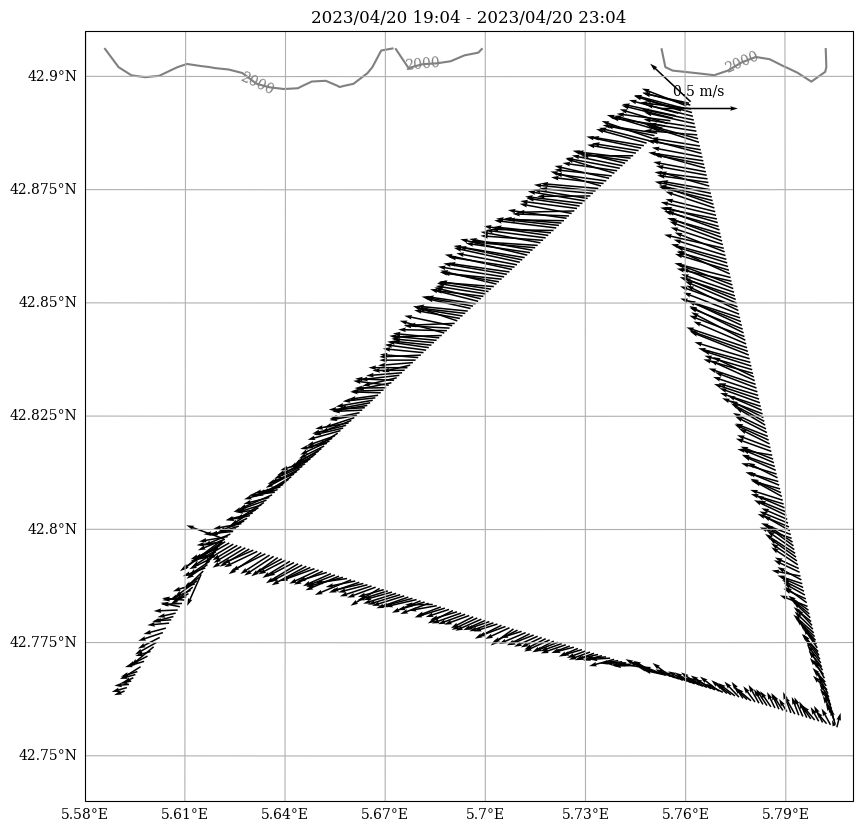

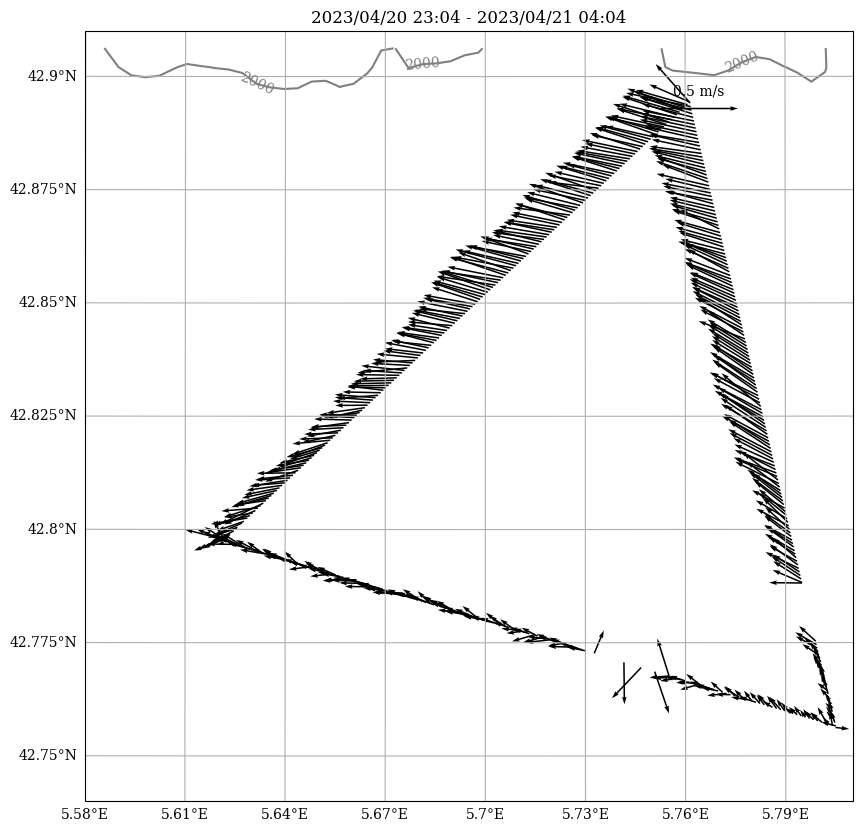

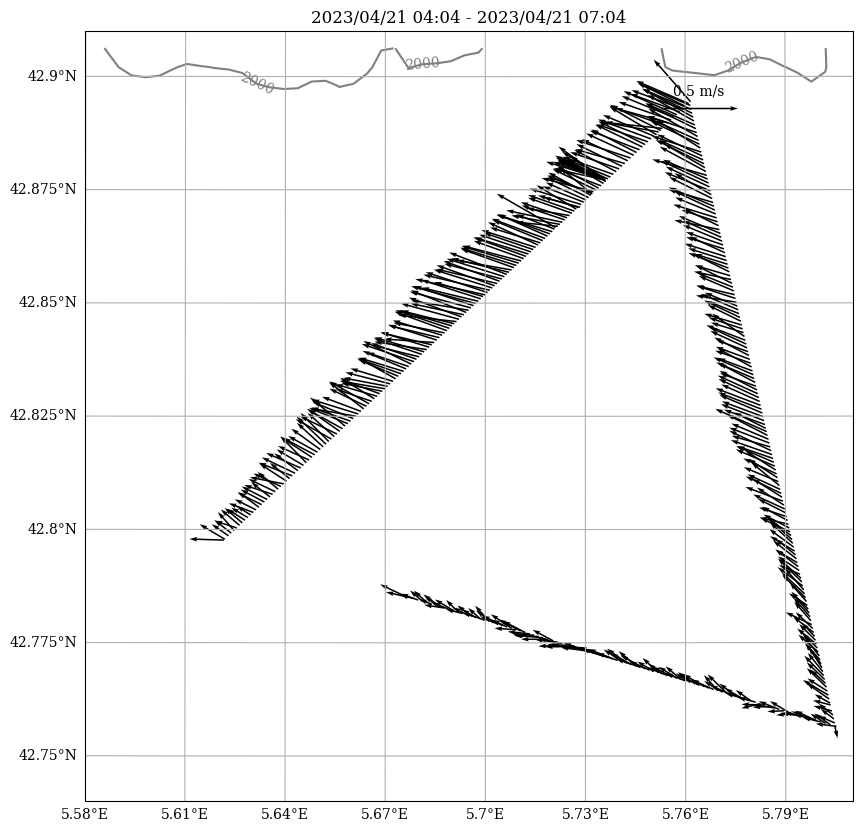

In [28]:
for i in range(3):
    d = f"T1{i}"
    start, end = p[d].start.time, p[d].end.time
    fig, ax, _ = cp.map(coastline="i", figsize=(10,10), extent=e)
    ut.add_adcp(ax, D, 1, 30, tstart=start, tend=end)
    #
    fmt = "%Y/%m/%d %H:%m"
    ax.set_title(start.strftime(fmt)+" - "+end.strftime(fmt))